In [49]:
# Importación de librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [50]:
# Leer el archivo CSV
file_path = 'C:/Users/carlo/diabetes_indiana.csv'
data = pd.read_csv(file_path)

In [51]:
column_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 
                'Feature6', 'Feature7', 'Feature8', 'Outcome']
df = pd.read_csv('diabetes_indiana.csv', header=None, names=column_names)
print(df.columns)

Index(['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6',
       'Feature7', 'Feature8', 'Outcome'],
      dtype='object')


In [52]:
# Rellenar valores faltantes con la mediana de cada columna
df.fillna(df.median(), inplace=True)

In [53]:
# Dividir el conjunto de datos en variables predictoras (X) y variable objetivo (y)
X = df.drop('Outcome', axis=1)  # Suponiendo que la columna 'Outcome' es la variable objetivo
y = df['Outcome']

In [54]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# Implementar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

In [57]:
# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7662337662337663
Confusion Matrix:
 [[133  20]
 [ 34  44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       153
           1       0.69      0.56      0.62        78

    accuracy                           0.77       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



In [58]:
# Optimización del modelo utilizando GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [59]:
# Mejor combinación de parámetros encontrados por GridSearch
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [60]:
# Evaluar el modelo optimizado
best_rf_model = grid_search.best_estimator_
y_pred_optimized = best_rf_model.predict(X_test)
print("Accuracy después de optimización:", accuracy_score(y_test, y_pred_optimized))
print("Confusion Matrix después de optimización:\n", confusion_matrix(y_test, y_pred_optimized))
print("Classification Report después de optimización:\n", classification_report(y_test, y_pred_optimized))

Accuracy después de optimización: 0.7662337662337663
Confusion Matrix después de optimización:
 [[132  21]
 [ 33  45]]
Classification Report después de optimización:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       153
           1       0.68      0.58      0.62        78

    accuracy                           0.77       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



In [61]:
# Visualización de la importancia de las características
importances = best_rf_model.feature_importances_
indices = pd.Series(importances, index=X.columns).sort_values(ascending=False)

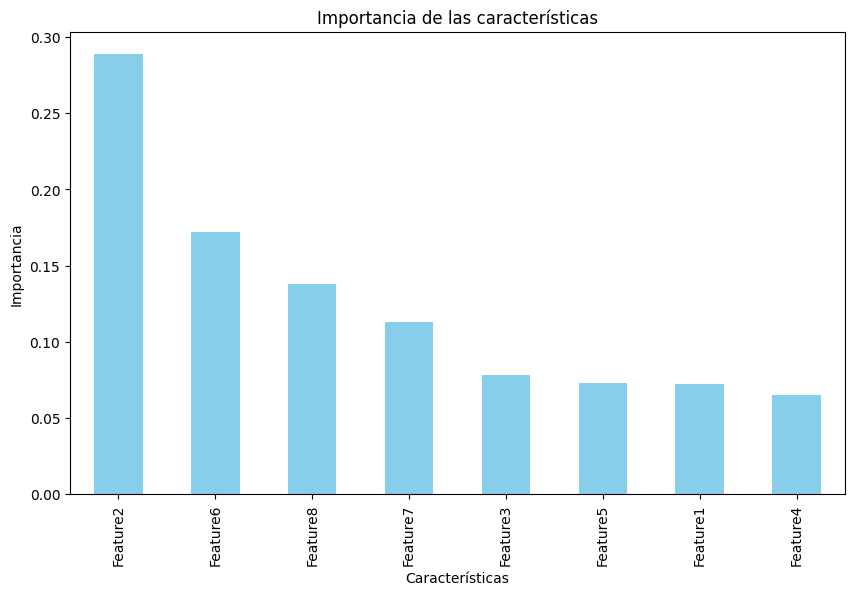

In [62]:
plt.figure(figsize=(10, 6))
indices.plot(kind='bar', color='skyblue')
plt.title('Importancia de las características')
plt.ylabel('Importancia')
plt.xlabel('Características')
plt.show()